## Импортируем нужные библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

## Создаем и визуализируем данные

In [ ]:
num=40
X = np.random.randn(num,1)
Y = 2 + X + 2*X**2 + np.random.randn(num,1)

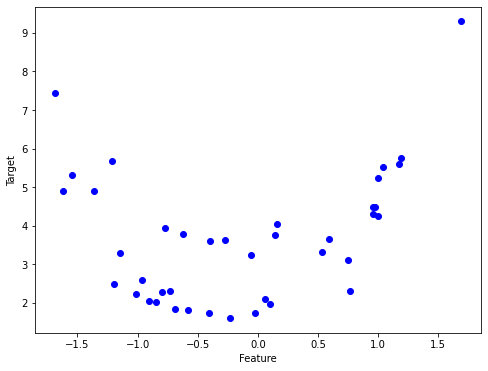

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'ob')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Обучаем алгоритм линейной регрессии

In [ ]:
# Метод нормального уравнения
lr = LinearRegression()
lr.fit(X,Y)
ypred = lr.predict(X)

In [ ]:
lr.intercept_, lr.coef_

(array([4.31675899]), array([[1.59352715]]))

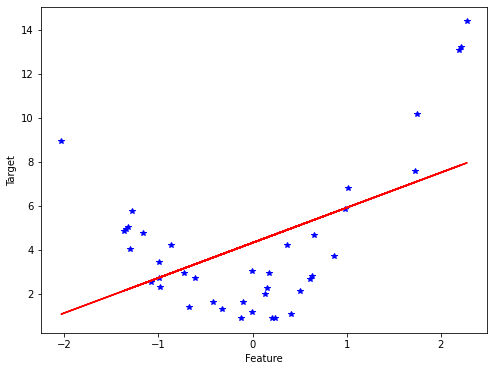

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(X, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [ ]:
# Метод градиентного спуска
sgd = SGDRegressor(verbose=1)
sgd.fit(X,Y)
ypred = sgd.predict(X)

-- Epoch 1
Norm: 0.36, NNZs: 1, Bias: 0.784085, T: 40, Avg. loss: 13.130524
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.55, NNZs: 1, Bias: 1.258033, T: 80, Avg. loss: 10.541295
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 1, Bias: 1.624423, T: 120, Avg. loss: 9.040470
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.80, NNZs: 1, Bias: 1.920239, T: 160, Avg. loss: 8.000581
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.89, NNZs: 1, Bias: 2.167343, T: 200, Avg. loss: 7.249209
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 1, Bias: 2.378583, T: 240, Avg. loss: 6.680382
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 1.04, NNZs: 1, Bias: 2.561450, T: 280, Avg. loss: 6.241770
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 1.09, NNZs: 1, Bias: 2.721361, T: 320, Avg. loss: 5.896662
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 1.15, NNZs: 1, Bias: 2.863332, T: 360, Avg. loss: 5.620903
Total training time: 0.02 seconds.
-

C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


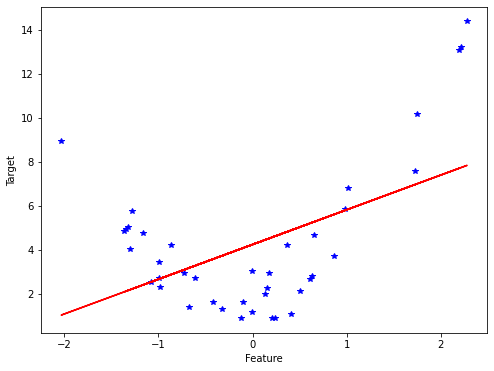

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(X, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Создадим полиномиальные признаки и проведен нормировку данных

Проделать обучающие шаги в по теме полиномиальной регрессии в приложенном Jupyter Notebook

Обучить полиномиальную регрессию для датасета Steels Kaggle и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры. Построить зависимость предсказанного от реального значения и рассчитать ошибку (как для обучающей, так и тестовой выборок). 

Для случая большого числа полиномиальных признаков использовать регуляризацию. Постараться достичь минимально возможной ошибки на тестовой выборке.

[*] По желанию можно использовать кросс-валидацию для расчета метрики ошибки и поиск по сетке для подбора параметров регуляризации. Также можно самостоятельно реализовать алгоритм градиентного спуска и с его помощью рассчитать ошибку.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
#создание полиномиальных признаков
pf = PolynomialFeatures(degree=300)
Xpoly = pf.fit_transform(X)

Xtest = np.linspace(min(X),max(X),1000).reshape(1000,1)
Xtest_poly = pf.transform(Xtest)

In [ ]:
X.shape, Xpoly.shape, Xtest.shape

((40, 1), (40, 301), (1000, 1))

In [ ]:
X

array([[-0.22862995],
       [-0.05808034],
       [-0.84702513],
       [ 1.17599538],
       [ 0.95764115],
       [ 0.99683919],
       [-0.77203128],
       [-0.39534843],
       [-0.58452955],
       [ 0.14026456],
       [-0.27189292],
       [ 0.96268703],
       [-0.02037007],
       [-0.69188787],
       [-0.6199585 ],
       [ 0.97880974],
       [ 0.99651969],
       [-0.79339793],
       [-1.68824206],
       [-1.36374148],
       [-0.90912476],
       [-1.54652946],
       [ 0.15745917],
       [ 1.1905299 ],
       [-0.95960156],
       [-0.40880385],
       [-1.01301639],
       [ 0.76469202],
       [ 0.53704416],
       [-1.61776269],
       [ 0.74656959],
       [-1.19422794],
       [ 1.04446493],
       [ 0.10099708],
       [ 0.05614988],
       [-1.14755506],
       [ 0.59420544],
       [-1.21518459],
       [-0.73199347],
       [ 1.68819987]])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xpoly)
X_test_scaled = scaler.transform(Xtest_poly)

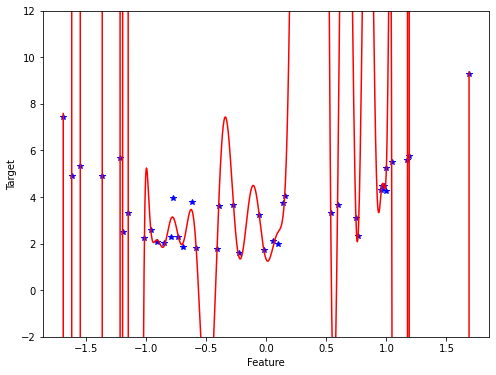

In [ ]:
lr = LinearRegression()
lr.fit(X_scaled,Y)
ypred = lr.predict(X_test_scaled)
ytrain_pred = lr.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.ylim(-2,12)
plt.show()

In [ ]:
lr.coef_

array([[-3.06665349e+11,  3.44448252e+01, -1.65050142e+01,
        -8.90474214e+03,  4.72543629e+03,  9.06077637e+05,
        -1.73452394e+03, -4.46083991e+07, -2.35002840e+07,
         1.21231030e+09,  1.21149704e+09, -1.94405375e+10,
        -2.76526289e+10,  1.87741584e+11,  3.42493420e+11,
        -1.06695799e+12, -2.42040364e+12,  3.24894125e+12,
         9.56428966e+12, -3.73661873e+12, -1.88009869e+13,
        -2.38426553e+12,  1.10183296e+13,  2.49182960e+12,
         9.28915700e+12,  8.13216863e+12, -3.20297193e+12,
         2.64560125e+12, -5.36987918e+12, -6.14916065e+12,
        -2.52607334e+12, -8.99758040e+12, -1.50648981e+12,
        -5.91029027e+12, -2.22687981e+12, -1.28737354e+12,
        -2.66223842e+12,  2.03672157e+12, -1.95356562e+12,
         3.35875974e+12, -4.48433326e+11,  3.32616258e+12,
         1.15269440e+12,  2.63865706e+12,  2.40733550e+12,
         1.95692013e+12,  3.05462991e+12,  1.37176638e+12,
         3.26253548e+12,  9.75341430e+11,  3.15632178e+1

## Обучение моделей с регуляризацией

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [ ]:
ridge = Ridge(alpha=1)

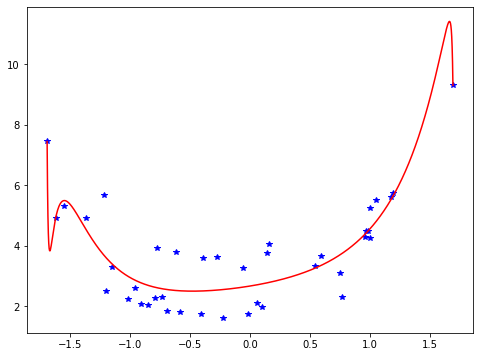

In [ ]:
ridge.fit(X_scaled,Y)
ypred = ridge.predict(X_test_scaled)
ytrain_pred = ridge.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [ ]:
ridge.coef_

array([[ 0.00000000e+00,  8.16834390e-01,  2.69861390e+00,
        -1.70017014e-01,  4.73749283e-01, -1.88483911e-01,
        -5.08812283e-02, -4.53673077e-02, -1.32621209e-01,
         4.35478433e-02, -1.17380119e-01,  8.04386625e-02,
        -8.86552441e-02,  8.93479204e-02, -6.43594825e-02,
         8.55727984e-02, -4.64994206e-02,  7.68127200e-02,
        -3.37984550e-02,  6.66654703e-02, -2.47632395e-02,
         5.67337820e-02, -1.82707725e-02,  4.76731571e-02,
        -1.35610915e-02,  3.96931299e-02, -1.01302341e-02,
         3.27981735e-02, -7.63843358e-03,  2.69047747e-02,
        -5.84882642e-03,  2.18983114e-02, -4.58993925e-03,
         1.76600364e-02, -3.73341439e-03,  1.40790719e-02,
        -3.18075027e-03,  1.10569370e-02, -2.85517948e-03,
         8.50846294e-03, -2.69643939e-03,  6.36106542e-03,
        -2.65718730e-03,  4.55337312e-03, -2.70038358e-03,
         3.03369669e-03, -2.79727922e-03,  1.75856295e-03,
        -2.92581167e-03,  6.91403898e-04, -3.06929903e-0

In [ ]:
ridgecv = RidgeCV(alphas=np.linspace(1e-2,1,100))

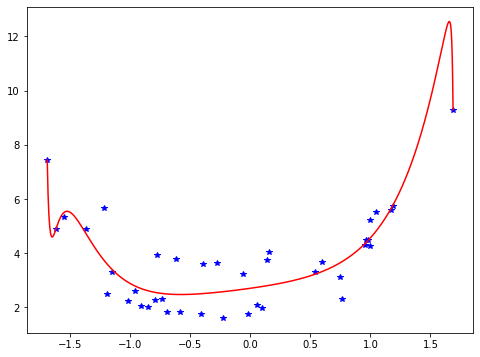

In [ ]:
ridgecv.fit(X_scaled,Y)
ypred = ridgecv.predict(X_test_scaled)
ytrain_pred = ridgecv.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [ ]:
ridgecv.alpha_

1.0

In [ ]:
ridgecv.coef_

array([[ 0.00000000e+00,  8.16834390e-01,  2.69861390e+00,
        -1.70017014e-01,  4.73749283e-01, -1.88483911e-01,
        -5.08812283e-02, -4.53673077e-02, -1.32621209e-01,
         4.35478433e-02, -1.17380119e-01,  8.04386625e-02,
        -8.86552441e-02,  8.93479204e-02, -6.43594825e-02,
         8.55727984e-02, -4.64994206e-02,  7.68127200e-02,
        -3.37984550e-02,  6.66654703e-02, -2.47632395e-02,
         5.67337820e-02, -1.82707725e-02,  4.76731571e-02,
        -1.35610915e-02,  3.96931299e-02, -1.01302341e-02,
         3.27981735e-02, -7.63843358e-03,  2.69047747e-02,
        -5.84882642e-03,  2.18983114e-02, -4.58993925e-03,
         1.76600364e-02, -3.73341439e-03,  1.40790719e-02,
        -3.18075026e-03,  1.10569370e-02, -2.85517948e-03,
         8.50846294e-03, -2.69643939e-03,  6.36106542e-03,
        -2.65718730e-03,  4.55337312e-03, -2.70038358e-03,
         3.03369669e-03, -2.79727922e-03,  1.75856295e-03,
        -2.92581166e-03,  6.91403898e-04, -3.06929903e-0

In [ ]:
lassocv = LassoCV(alphas=np.linspace(1e-4,1,100))

C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.246e+00, tolerance: 2.445e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_desce

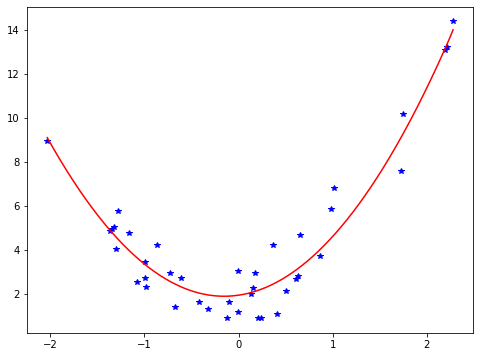

In [ ]:
lassocv.fit(X_scaled,Y)
ypred = lassocv.predict(X_test_scaled)
ytrain_pred = lassocv.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [ ]:
lassocv.alpha_

0.060700000000000004

In [ ]:
lassocv.intercept_, lassocv.coef_

(4.291791599140671,
 array([0.00000000e+00, 6.73739727e-01, 2.90719840e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00

## Домашнее задание

Обучить полиномиальную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры. Для большого числа признаков использовать регуляризацию. Постараться достичь минимально возможной ошибки на тестовой выборке. 

По желанию можно использовать кросс-валидацию для расчет метрики ошибки и поиск по сетке для подбора параметров регуляризации. Также можно самим реализовать алгоритм градиентного спуска и с его помощью рассчитать ошибку.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
import pandas as pd
from tqdm import tqdm

In [3]:
df = pd.read_csv('Steels_kaggle.csv')

In [5]:
y = df[' 0.2% Proof Stress (MPa)']
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)']]
X.shape, y.shape

((915, 15), (915,))

In [39]:
pf = PolynomialFeatures(degree=4)
X_poly = pf.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)
y_train, y_test = y_train.ravel(), y_test.ravel()

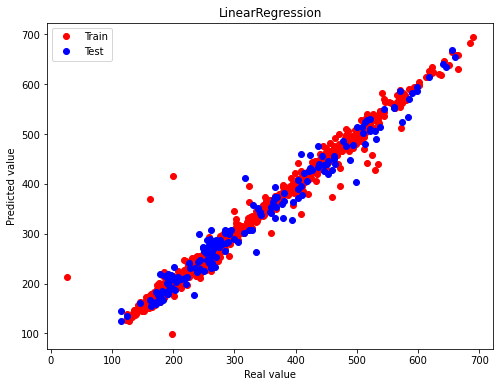

test: 22.497855766394814
train: 19.821220394044524


In [40]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_test_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(y_train, y_train_pred, 'or', label='Train')
plt.plot(y_test, y_test_pred, 'ob', label='Test')
plt.title('LinearRegression')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()
print(f'test: {mse(y_test, y_test_pred, squared=False)}')
print(f'train: {mse(y_train, y_train_pred, squared=False)}')

Хочу заметить, что на значение RMSE очень сильно влияет какой random_state мы выберем (на семинаре всегда был 42)

In [41]:
def model(k, rs):
    pf = PolynomialFeatures(degree=k)
    X_poly = pf.fit_transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=rs)
    y_train, y_test = y_train.ravel(), y_test.ravel()

    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_test_pred = lr.predict(X_test_scaled)
    y_train_pred = lr.predict(X_train_scaled)

    return [mse(y_test, y_test_pred, squared=False), mse(y_train, y_train_pred, squared=False)]

1
2
3
4
5


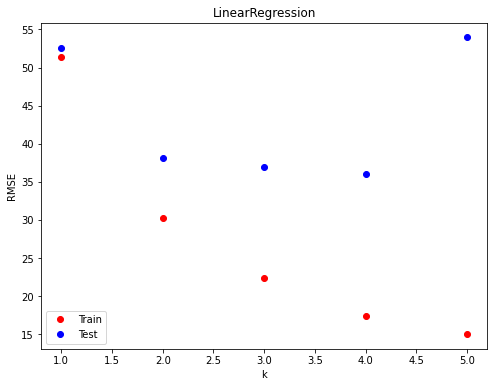

In [42]:
k = np.arange(1, 6)
# print(k)
out = []
for i in k:
    out.append(model(i, 42))
    print(i)

out = np.array(out)
fig = plt.figure(figsize=(8,6))
plt.title('LinearRegression')
plt.plot(k, out[:, 1], 'or', label='Train')
plt.plot(k, out[:, 0], 'ob', label='Test')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Получаем что при degree = 4 наиллучший результат. Теперь поварьируем random state

41
42
43
44


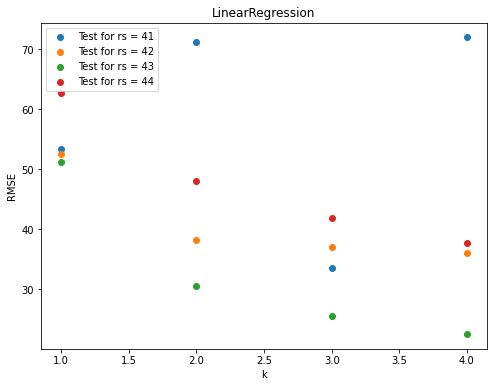

In [47]:
k = np.arange(1, 5)
# print(k)
rs = [41, 42, 43, 44]
out = []
for rs_ in rs:
    tmp = []
    for i in k:
        tmp.append(model(i, rs_))
    out.append(tmp)
    print(rs_)

out = np.array(out)
fig = plt.figure(figsize=(8,6))
plt.title('LinearRegression')
# plt.plot(k, out[:, 1], 'or', label='Train')
for i in range(len(rs)):
    plt.scatter(k, out[i, :, 0], label=f'Test for rs = {rs[i]}')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()

При 43 наименьшая ошибка на тесте. Будем использовать его

In [60]:
def model_new(lr, X_scaled):
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)
    y_train, y_test = y_train.ravel(), y_test.ravel()

    # lr = funk
    lr.fit(X_train_scaled, y_train)
    y_test_pred = lr.predict(X_test_scaled)
    y_train_pred = lr.predict(X_train_scaled)

    return [mse(y_test, y_test_pred, squared=False), mse(y_train, y_train_pred, squared=False)]

def gridresearch(reg, k, alpha):
    out = []
    for k_ in k:

        pf = PolynomialFeatures(degree=k_)
        X_poly = pf.fit_transform(X)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_poly)

        for alpha_ in tqdm(alpha):
            # print(i)
            out.append([k_, alpha_, *model_new(reg(alpha_), X_scaled)])

    out = np.array(out)
    return out

100%|██████████| 50/50 [01:43<00:00,  2.07s/it]


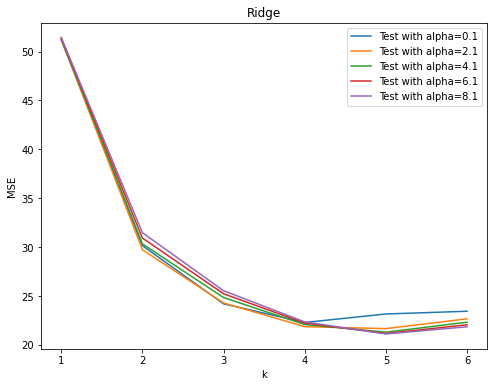

In [64]:
k = np.arange(1, 7)
alpha = np.arange(0.1, 10, 0.2)

out = gridresearch(Ridge, k, alpha)
# print(out)

fig = plt.figure(figsize=(8,6))
plt.title('Ridge')
# plt.plot(k, out[:, 1], 'or', label='Train')
for alpha_ in alpha[::10]:
    # tmp = out[:, 1] == alpha_
    # print(tmp, alpha_, out[:, 1])
    plt.plot(k, out[out[:, 1] == alpha_, 2], label=f'Test with alpha={alpha_:.1f}')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

np.savetxt('Ridge.txt', out)

  0%|          | 0/25 [00:00<?, ?it/s]C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.209e+04, tolerance: 1.264e+03
  model = cd_fast.enet_coordinate_descent(
  4%|▍         | 1/25 [00:00<00:03,  6.99it/s]C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+03, tolerance: 1.264e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Xiaomi\AppDat

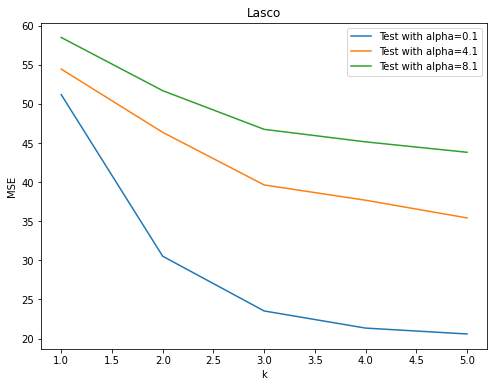

In [66]:
k = np.arange(1, 6)
alpha = np.arange(0.1, 10, 0.4)

out = gridresearch(Lasso, k, alpha)
# print(out)

fig = plt.figure(figsize=(8,6))
plt.title('Lasco')
# plt.plot(k, out[:, 1], 'or', label='Train')
for alpha_ in alpha[::10]:
    # tmp = out[:, 1] == alpha_
    # print(tmp, alpha_, out[:, 1])
    plt.plot(k, out[out[:, 1] == alpha_, 2], label=f'Test with alpha={alpha_:.1f}')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

np.savetxt('Lasco.txt', out)

  0%|          | 0/40 [00:00<?, ?it/s]C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+05, tolerance: 1.264e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.085e+05, tolerance: 1.264e+03
  model = cd_fast.enet_coordinate_descent(
  5%|▌         | 2/40 [00:00<00:03, 10.76it/s]C:\Users\Xiaomi\AppDat

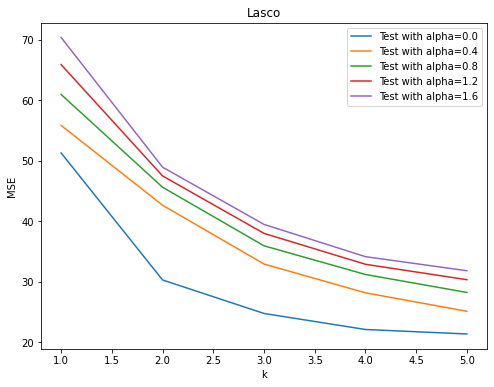

In [67]:
k = np.arange(1, 6)
alpha = np.arange(0.01, 2, 0.05)

out = gridresearch(ElasticNet, k, alpha)
# print(out)

fig = plt.figure(figsize=(8,6))
plt.title('Lasco')
# plt.plot(k, out[:, 1], 'or', label='Train')
for alpha_ in alpha[::8]:
    # tmp = out[:, 1] == alpha_
    # print(tmp, alpha_, out[:, 1])
    plt.plot(k, out[out[:, 1] == alpha_, 2], label=f'Test with alpha={alpha_:.1f}')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

np.savetxt('Elasticnet.txt', out)

In [80]:
inp = ['Elasticnet.txt', 'Ridge.txt', 'Lasco.txt']

for s in inp:
    data = np.genfromtxt(s)
    # print(data[:, 2], np.argmin(data[:, 2]))
    print(s)
    print(data[np.argmin(data[:, 2])])

Elasticnet.txt
[ 5.          0.06       21.09802449 24.22831237]
Ridge.txt
[ 5.          9.9        21.10027585 22.29277721]
Lasco.txt
[ 5.          0.1        20.58785553 24.26158771]


Видно, что минимум достигается при Lasso(alpha=0.1) и степени многочлена k=5

C:\Users\Xiaomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.227e+04, tolerance: 1.264e+03
  model = cd_fast.enet_coordinate_descent(


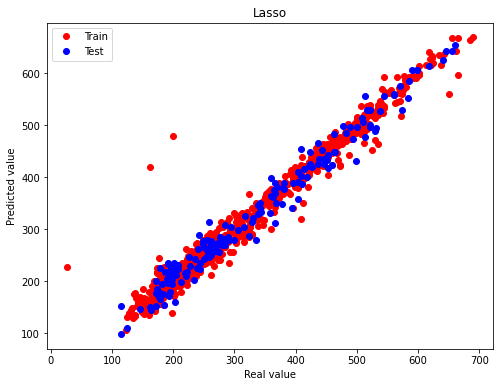

test: 20.58785552711857
train: 24.26158770803625


In [83]:
pf = PolynomialFeatures(degree=5)
X_poly = pf.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)
y_train, y_test = y_train.ravel(), y_test.ravel()

lr = Lasso(alpha=0.1)
lr.fit(X_train_scaled, y_train)
y_test_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(y_train, y_train_pred, 'or', label='Train')
plt.plot(y_test, y_test_pred, 'ob', label='Test')
plt.title('Lasso')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()
print(f'test: {mse(y_test, y_test_pred, squared=False)}')
print(f'train: {mse(y_train, y_train_pred, squared=False)}')